# Text Processing in NLP

## 1.Python String

A String is like a sequence of Characters.

A character is just a symbol.Like, the English language has 26 characters.

Computers don't deal with characters,they deal with binary(numbers) only. Even though you seen characters but internally it is stored and manipulated with the combination of 0's and 1's.
The conversion of character to a number is known as encoding, and the reverse is decoding.

String literally surrounded by a single or double quotations like:

In [1]:
a = "UpGrad"
print(a)

UpGrad


### Strings are arrays

Like in other popular programming languages, strings in Python are arrays of bytes represents unicode characters.

However, Python doesn't have the character as the datatype, single character is just simply a string with length of 1.

We used square bracket to access elements from the string.

In [2]:
#Get the character at position 4(Here, indexing starts from 0)
a = "UpGrad"
print(a[4]) 

a


### Slicing

You can get the output upto certain range of characters by using the slicing index.

Specify the start index and end index, which is separated by colon, to return a part of the string.

In [3]:
#To get the output from the position 3 to 6(not included)
a = "UpGrad"
print(a[3:6])
print("-" * 50)
#To get the output by negative indexing from -6 position to -2 position.
print(a[-6:-2])
print("-" * 50)
#Get the results from position 2 to 6 but give result with the increment of 2.
print(a[2:6:2])

rad
--------------------------------------------------
UpGr
--------------------------------------------------
Ga


### String Methods 

Python have set of built-in methods that you can use on strings.

In [4]:
#strip() will remove whitespace in the string from begining to the end.
a = " UpGrad "
print(a.split())

['UpGrad']


In [5]:
#lower() will lowercase the words which are upper in the sentences.
a = "UpGrad"
print(a.lower())

#upper() will transform lowercase into upper.
print(a.upper())

upgrad
UPGRAD


In [6]:
#replace() will work like replace one string with another string.
a = "UpGrad"
print(a.replace("U", "Me"))

MepGrad


In [7]:
#split() will split the strings into substrings if it finds any instances of seprator.
a = "UpGrad"
print(a.split("G"))

['Up', 'rad']


### String Concatenation
To concatenate or combine two strings by use of + operator.

In [8]:
a = "UpGrad"
b = "Data"
print(a +" "+ b)

UpGrad Data


# Text Preprocessing

Supose we have textual data available, we need to apply many of pre-processing steps to the data to transform those words into numerical features that work with machine learning algorithms.

The pre-processing steps for the problem depend mainly on the domain and the problem itself.We don't need to apply all the steps for every problem.

Here, we're going to see text preprocessing in Python. We'll use NLTK(Natural language toolkit) library here.

In [9]:
# import necessary libraries 
import nltk
import string
import re

### Text lowercase
We do lowercase the text to reduce the size of the vocabulary of our text data.

In [10]:
def lowercase_text(text): 
    return text.lower() 
  
input_str = "Weather is too Cloudy.Possiblity of Rain is High,Today!!"
lowercase_text(input_str)

'weather is too cloudy.possiblity of rain is high,today!!'

### Remove numbers

We should either remove the numbers or convert those numbers into textual representations. We use regular expressions(re) to remove the numbers.

In [11]:
def remove_num(text): 
    result = re.sub(r'\d+', '', text) 
    return result 
  
input_s = "You bought 6 candies from shop, and 4 candies are in home."
remove_num(input_s)

'You bought  candies from shop, and  candies are in home.'

As we mentioned above,you can also convert the numbers into words. This could be done by using the inflect library.

In [12]:
# import the library 
import inflect 
q = inflect.engine() 
  
# convert number into text 
def convert_num(text): 
    # split strings into list of texts 
    temp_string = text.split() 
    # initialise empty list 
    new_str = [] 
  
    for word in temp_string: 
        # if text is a digit, convert the digit 
        # to numbers and append into the new_str list 
        if word.isdigit(): 
            temp = q.number_to_words(word) 
            new_str.append(temp) 
  
        # append the texts as it is 
        else: 
            new_str.append(word) 
  
    # join the texts of new_str to form a string 
    temp_str = ' '.join(new_str) 
    return temp_str 
  
input_str = 'You bought 6 candies from shop, and 4 candies are in home.'
convert_num(input_str)

'You bought six candies from shop, and four candies are in home.'

### Remove Punctuation

We remove punctuations because of that we don't have different form of the same word. If we don't remove punctuations, then been, been, and been! will be treated separately.

In [13]:
# let's remove punctuation 
def rem_punct(text): 
    translator = str.maketrans('', '', string.punctuation) 
    return text.translate(translator) 
  
input_str = "Hey, Are you excited??, After a week, we will be in Shimla!!!"
rem_punct(input_str)

'Hey Are you excited After a week we will be in Shimla'

### Remove default stopwords:
Stopwords are words that do not contribute to the meaning of the sentence. Hence, they can be safely removed without causing any change in the meaning of a sentence. The NLTK(Natural Language Toolkit) library has the set of stopwords and we can use these to remove stopwords from our text and return a list of word tokens.

In [14]:
# importing nltk library
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

nltk.download('stopwords')
nltk.download('punkt')
  
# remove stopwords function 
def rem_stopwords(text): 
    stop_words = set(stopwords.words("english")) 
    word_tokens = word_tokenize(text) 
    filtered_text = [word for word in word_tokens if word not in stop_words] 
    return filtered_text 
  
ex_text = "Data is the new oil. A.I is the last invention"
rem_stopwords(ex_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Data', 'new', 'oil', '.', 'A.I', 'last', 'invention']

### Stemming

From Stemming we will process of getting the root form of a word. Root or Stem is the part to which inflextional affixes(like -ed, -ize, etc) are added. We would create the stem words by removing the prefix of suffix of a word. So, stemming a word may not result in actual words.

For Example: Mangoes ---> Mango

             Boys ---> Boy
             
             going ---> go
             
             
If our sentences are not in tokens, then we need to convert it into tokens. After we converted strings of text into tokens, then we can convert those word tokens into their root form. These are the Porter stemmer, the snowball stemmer, and the Lancaster Stemmer. We usually use Porter stemmer among them.

In [15]:
#importing nltk's porter stemmer 
from nltk.stem.porter import PorterStemmer 
from nltk.tokenize import word_tokenize 
stem1 = PorterStemmer() 
  
# stem words in the list of tokenised words 
def s_words(text): 
    word_tokens = word_tokenize(text) 
    stems = [stem1.stem(word) for word in word_tokens] 
    return stems 
  
text = 'Data is the new revolution in the World, in a day one individual would generate terabytes of data.'
s_words(text)

['data',
 'is',
 'the',
 'new',
 'revolut',
 'in',
 'the',
 'world',
 ',',
 'in',
 'a',
 'day',
 'one',
 'individu',
 'would',
 'gener',
 'terabyt',
 'of',
 'data',
 '.']

### Lemmatization
As stemming, lemmatization do the same but the only difference is that lemmatization ensures that root word belongs to the language. Because of the use of lemmatization we will get the valid words. In NLTK(Natural language Toolkit), we use WordLemmatizer to get the lemmas of words. We also need to provide a context for the lemmatization.So, we added pos(parts-of-speech) as a parameter.

In [16]:
from nltk.stem import wordnet 
from nltk.tokenize import word_tokenize 
lemma = wordnet.WordNetLemmatizer()
nltk.download('wordnet')
# lemmatize string 
def lemmatize_word(text): 
    word_tokens = word_tokenize(text) 
    # provide context i.e. part-of-speech(pos)
    lemmas = [lemma.lemmatize(word, pos ='v') for word in word_tokens] 
    return lemmas 
  
text = 'Data is the new revolution in the World, in a day one individual would generate terabytes of data.'
lemmatize_word(text)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['Data',
 'be',
 'the',
 'new',
 'revolution',
 'in',
 'the',
 'World',
 ',',
 'in',
 'a',
 'day',
 'one',
 'individual',
 'would',
 'generate',
 'terabytes',
 'of',
 'data',
 '.']

In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Parts of Speech (POS) Tagging
The pos(parts of speech) explain you how a word is used in a sentence. In the sentence, a word have different contexts and semantic meanings. The basic natural language processing(NLP) models like bag-of-words(bow) fails to identify these relation between the words. For that we use pos tagging to mark a word to its pos tag based on its context in the data. Pos is also used to extract rlationship between the words.

In [18]:
# importing tokenize library
from nltk.tokenize import word_tokenize 
from nltk import pos_tag 
nltk.download('averaged_perceptron_tagger')
  
# convert text into word_tokens with their tags 
def pos_tagg(text): 
    word_tokens = word_tokenize(text) 
    return pos_tag(word_tokens) 
  
pos_tagg('Are you afraid of something?')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Are', 'NNP'),
 ('you', 'PRP'),
 ('afraid', 'IN'),
 ('of', 'IN'),
 ('something', 'NN'),
 ('?', '.')]

In the above example NNP stands for Proper noun, PRP stands for personal noun, IN as Preposition. We can get all the details pos tags using the Penn Treebank tagset.

In [19]:
# downloading the tagset  
nltk.download('tagsets') 
  
# extract information about the tag 
nltk.help.upenn_tagset('PRP')

PRP: pronoun, personal
    hers herself him himself hisself it itself me myself one oneself ours
    ourselves ownself self she thee theirs them themselves they thou thy us


[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


### Chunking
Chunking is the process of extracting phrases from the Unstructured text and give them more structure to it. We also called them shallow parsing.We can do it on top of pos tagging. It groups words into chunks mainly for noun phrases. chunking we do by using regular expression.

In [20]:
#importing libraries
from nltk.tokenize import word_tokenize  
from nltk import pos_tag 
  
# here we define chunking function with text and regular 
# expressions representing grammar as parameter 
def chunking(text, grammar): 
    word_tokens = word_tokenize(text) 
  
    # label words with pos 
    word_pos = pos_tag(word_tokens) 
  
    # create chunk parser using grammar 
    chunkParser = nltk.RegexpParser(grammar) 
  
    # test it on the list of word tokens with tagged pos 
    tree = chunkParser.parse(word_pos) 
      
    for subtree in tree.subtrees(): 
        print(subtree) 
    #tree.draw() 
      
sentence = 'the little red parrot is flying in the sky'
grammar = "NP: {<DT>?<JJ>*<NN>}"
chunking(sentence, grammar)

(S
  (NP the/DT little/JJ red/JJ parrot/NN)
  is/VBZ
  flying/VBG
  in/IN
  (NP the/DT sky/NN))
(NP the/DT little/JJ red/JJ parrot/NN)
(NP the/DT sky/NN)


In the above example, we defined the grammar by using the regular expression rule. This rule tells you that NP(noun phrase) chunk should be formed whenever the chunker find the optional determiner(DJ) followed by any no. of adjectives and then a NN(noun).

### Named Entity Recognition

It is used to extract information from unstructured text. It is used to classy the entities which is present in the text into categories like a person, organization, event, places, etc. This will give you a detail knowledge about the text and the relationship between the different entities.

In [21]:
#Importing tokenization and chunk
from nltk.tokenize import word_tokenize 
from nltk import pos_tag, ne_chunk 
nltk.download('maxent_ne_chunker')
nltk.download('words')
  
def ner(text): 
    # tokenize the text 
    word_tokens = word_tokenize(text) 
  
    # pos tagging of words 
    word_pos = pos_tag(word_tokens) 
  
    # tree of word entities 
    print(ne_chunk(word_pos)) 
  
text = 'Brain Lara scored the highest 400 runs in a test match which played in between WI and England.'
ner(text)

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


(S
  (PERSON Brain/NNP)
  (PERSON Lara/NNP)
  scored/VBD
  the/DT
  highest/JJS
  400/CD
  runs/NNS
  in/IN
  a/DT
  test/NN
  match/NN
  which/WDT
  played/VBD
  in/IN
  between/IN
  (ORGANIZATION WI/NNP)
  and/CC
  (GPE England/NNP)
  ./.)


# Understanding Regex

As you're a software developer, you have probably encountered regular expressions many times and got consufed many times with these daunting set of characters grouped together like this:

<img src=".\Images\12.png">

And you may wondered what this is all about?

Regular Expressions(Regx or RegExp) are too useful in stepping up your algorithm game and this will make you a better problem solver. The structure of Regx can be intimidating at first, but it is very rewarding once you got all the patterns and implement them in your work properly.


## What is RegEx and why is it important?

A Regex or we called it as regular expression, it is a type of object will help you out to extract information from any string data by searching through text and find it out what you need.Whether it's punctuation, numbers, letters, or even white spaces, RegEx will allow you to check and match any of the character combination in strings.

For example, suppose you need to match the format of a email addresses or security numbers. You can utilize RegEx to check the pattern inside the text strings and use it to replace another substring.

For instance, a RegEx could tell the program to search for the specific text from the string and then to print out the output accordingly. Expressions can include Text matching, Repetition of words,Branching,pattern-composition.

Python supports RegEx through libraries. In RegEx supports for various things like **Identifiers, Modifiers, and White Space.**
<img src=".\Images\13.png">

### RegEx Syntax

    import re

- *re* library in Python is used for string searching and manipulation.
- We also used it frequently for web scraping.

#### Example for w+ and ^ Expression

- *^:* Here in this expression matches the start of a string.
- *w+:* This expression matches for the alphanumeric characters from inside the string.

Here, we will give one example of how you can use "w+" and "^" expressions in code. re.findall will cover in next parts,so just focus on the "w+" and "^" expression.

Let's have an example "UpGrad13, Data is a new fuel", if we execute the code we will get "UpGrad13" as a result.

In [22]:
import re
sent = "UpGrad13, Data is a new fuel"
r2 = re.findall(r"^\w+",sent)
print(r2)

['UpGrad13']


*Note:* If we remove '+' sign from \w, the output will change and it'll give only first character of the first letter, i.e [i]

####  Example of \s expression in re.split function

- "s:" This expression we use for creating a space in the string.

To understand better this expression we will use the split function in a simple example. In this example, we have to split each words using the "re.split" function and at the same time we have used \s that allows to parse each word in the string seperately.

In [23]:
import re

print((re.split(r'\s','We splited this sentence')))

['We', 'splited', 'this', 'sentence']


In [24]:
import re

print((re.split(r's','We splited this sentence')))

['We ', 'plited thi', ' ', 'entence']


Similarly, there are series of regular expression in Python that you can use in various ways like  \d,\D,$,\.,\b, etc.

### Use RegEx methods

The "re" packages provide several methods to actually perform queries on an input string. We will see different methods which are

re.match()
re.search()
re.findall()
Note: Based on the RegEx, Python offers two different primitive operations. This match method checks for the match only at the begining of the string while search checks for a match anywhere in the string.

### Using re.match()
The match function is used to match the RegEx pattern to string with optional flag. Here, in this "w+" and "\W" will match the words starting from "i" and thereafter ,anything which is not started with "i" is not identified. For checking match for each element in the list or string, we run the for loop.

In [25]:
import re

lists = ['icecream images', 'i immitated', 'inner peace']

for i in lists:
    q = re.match("(i\w+)\W(i\w+)", i)
    
    if q:
        print((q.groups()))

('icecream', 'images')


### Finding Pattern in the text(re.search())

A RegEx is commonly used to search for a pattern in the text. This method takes a RegEx pattern and a string and searches that pattern with the string.

For using re.search() function, you need to import re first. The search() function takes the "pattern" and "text" to scan from our given string and returns the match object when the pattern found or else not match.

In [26]:
import re

pattern = ["playing", "UpGrad"]
text = "Raju is playing outside."

for p in pattern:
    print("You're looking for '%s' in '%s'" %(p, text), end = ' ')
    
    if re.search(p, text):
        print('Found match!')
        
    else:
        print("no match found!")

You're looking for 'playing' in 'Raju is playing outside.' Found match!
You're looking for 'UpGrad' in 'Raju is playing outside.' no match found!


In the Above example, we look for two literal strings "playing", "UpGrad" and in text string we had taken "Raju is playing outside.". For "playing" we got the match and in the output we got "Found Match", while for the word "UpGrad" we didn't got any match. So,we got no match found for that word.

### Using re.findall() for text
We use re.findall() module is when you wnat to iterate over the lines of the file, it'll do like list all the matches in one go. Here in a example, we would like to fetch email address from the list and we want to fetch all emails from the list, we use re.findall() method.

In [27]:
import re

kgf = "Gaurav@upgrad.com, Nilesh@upgrad.com, Jay@upgrad.com, Vikash@upgrad.com, rahulnandanwar"

emails = re.findall(r'[\w\.-]+@[\w\.-]+', kgf)

for e in emails:
    print(e)

Gaurav@upgrad.com
Nilesh@upgrad.com
Jay@upgrad.com
Vikash@upgrad.com


### Word Count

I am assuming you have the understanding of tokenization,the first figure we can calculate is the word frequency.By *word frequency* we can find out how many times each tokens appear in the text. When talking about word frequency, we distinguished between *types* and *tokens*.Types are the distinct words in a corpus, whereas tokens are the words, including repeats. Let's see how this works in practice.

Let's take an example for better understanding:

“There is no need to panic. We need to work together, take small yet important measures to ensure self-protection,” the Prime Minister tweeted.

How many tokens and types are there in above sentences?

Let's use Python for calculating these figures. First, tokenize the sentence by using the tokenizer which uses the non-alphabetic characters as a separator.

In [28]:
from nltk.tokenize.regexp import WhitespaceTokenizer
m = "'There is no need to panic. We need to work together, take small yet important measures to ensure self-protection,' the Prime Minister tweeted."

Note in the above we had used a slightly different syntax for importing the module. You'll recognize by now the variable assignment.

In [29]:
tokens = WhitespaceTokenizer().tokenize(m)
print(len(tokens))

23


In [30]:
tokens

["'There",
 'is',
 'no',
 'need',
 'to',
 'panic.',
 'We',
 'need',
 'to',
 'work',
 'together,',
 'take',
 'small',
 'yet',
 'important',
 'measures',
 'to',
 'ensure',
 "self-protection,'",
 'the',
 'Prime',
 'Minister',
 'tweeted.']

In [31]:
my_vocab = set(tokens)
print(len(tokens))

23


In [32]:
my_vocab

{"'There",
 'Minister',
 'Prime',
 'We',
 'ensure',
 'important',
 'is',
 'measures',
 'need',
 'no',
 'panic.',
 "self-protection,'",
 'small',
 'take',
 'the',
 'to',
 'together,',
 'tweeted.',
 'work',
 'yet'}

Now we are going to perform the same operation but with the different tokenizer.

In [33]:
my_st = "'There is no need to panic. We need to work together, take small yet important measures to ensure self-protection,' the Prime Minister tweeted."

We'll import different tokenizer:

In [34]:
from nltk.tokenize.regexp import WordPunctTokenizer

Above tokenizer also split the words into tokens:

In [35]:
m_t = WordPunctTokenizer().tokenize(my_st)

print(len(m_t))

30


In [36]:
m_t

["'",
 'There',
 'is',
 'no',
 'need',
 'to',
 'panic',
 '.',
 'We',
 'need',
 'to',
 'work',
 'together',
 ',',
 'take',
 'small',
 'yet',
 'important',
 'measures',
 'to',
 'ensure',
 'self',
 '-',
 'protection',
 ",'",
 'the',
 'Prime',
 'Minister',
 'tweeted',
 '.']

In [37]:
my_vocab = set(m_t)
print(len(my_vocab))

26


In [38]:
my_vocab

{"'",
 ',',
 ",'",
 '-',
 '.',
 'Minister',
 'Prime',
 'There',
 'We',
 'ensure',
 'important',
 'is',
 'measures',
 'need',
 'no',
 'panic',
 'protection',
 'self',
 'small',
 'take',
 'the',
 'to',
 'together',
 'tweeted',
 'work',
 'yet'}

### Frequency distribution
What is Frequency distribution? This is basically counting words in your texts.To give a brief example of how it works,

In [39]:
#from nltk.book import *
import nltk
#nltk.download('gutenberg')
print("\n\n\n")
text1 = "'There is no need to panic. We need to work together, take small yet important measures to ensure self-protection,' the Prime Minister tweeted."
freqDist = nltk.FreqDist(word_tokenize(text1))
print(freqDist)





<FreqDist with 23 samples and 28 outcomes>


The class FreqDist works like a dictionary where keys are the words in the text and the values are count associated with that word. For example, if you want to see how many words "person" are in the text, you can type as:

In [40]:
print(freqDist["person"])

0


One of the most important function in FreqDist is the .keys() function. Let us see what will it give in a below code.

In [41]:
words = freqDist.keys()
print(type(words))

<class 'dict_keys'>


After running above code, it'll give as class 'dict_keys', in the other words, you get a list of all the words in your text.

And you want to see how many words are there in the text,


In [42]:
print(len(words))

23


In the class nltk.text.Text function do the same stuff, so what is the difference? The difference is that with FreqDist you can create your own texts without the necessity of converting your text to nltk.text.Text class.

And the other usual functon is plot. Plot will do like it displays the most used words in your text. So, if you want to see 15 most used words in the text , For example like:

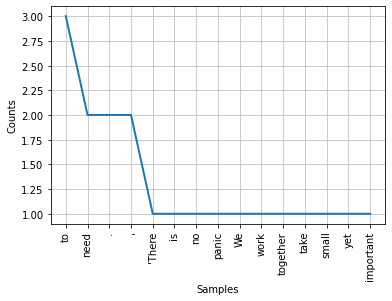

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [43]:
freqDist.plot(15)

### Personal Frequency Distribution
Suppose you want to do frequency distribution based on your own personal text. Let's get started,

In [44]:
from nltk import FreqDist
 
sent = "'There is no need to panic. We need to work together, take small yet important measures to ensure self-protection,' the Prime Minister tweeted."
 
text_list = sent.split(" ")
 
freqDist = FreqDist(text_list)
words = list(freqDist.keys())
 
print(freqDist['need'])

2


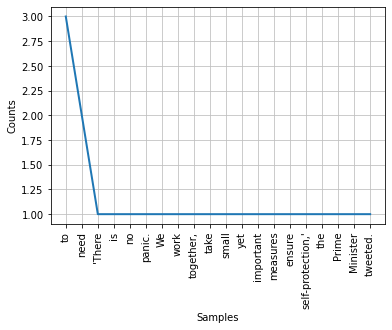

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [45]:
freqDist.plot(20)

In the first line, you don't have to import nltk.book to use the FreqDist class.

We then declare sent and text_list variables. The variable sent is your custom text and the variable text_list is a list that contains all the words of your custom text.You can see that we used sent.split(" ") to separate the words.

Then you have the variable freqDist and words. freqDist is an object of the FreqDist class is for the text you have given and words is the list of all keys of freqDist.

The last line of code is where you print your results. In this example, your code will print the count of the word “need”.

If you replace “need” with “Prime”, you can see that it will return 1 instead of 2. This is because nltk indexing is case-sensitive. To avoid this, you can use the .lower() function in the variable text.